<a href="https://colab.research.google.com/github/JakubPac/kurs_data_science/blob/main/sql_porownanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np

In [32]:
url = 'https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/online_retail.xlsx'
retail_raw = pd.read_excel(url)
retail_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [33]:
retail = retail_raw.copy()

In [34]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [35]:
retail.columns = [col.lower() for col in retail]

In [36]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    541909 non-null  object        
 1   stockcode    541909 non-null  object        
 2   description  540455 non-null  object        
 3   quantity     541909 non-null  int64         
 4   invoicedate  541909 non-null  datetime64[ns]
 5   unitprice    541909 non-null  float64       
 6   customerid   406829 non-null  float64       
 7   country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [37]:
retail.isnull().sum()

,0
invoiceno,0
stockcode,0
description,1454
quantity,0
invoicedate,0
unitprice,0
customerid,135080
country,0


In [38]:
retail = retail.dropna()

In [39]:
retail.isnull().sum()

,0
invoiceno,0
stockcode,0
description,0
quantity,0
invoicedate,0
unitprice,0
customerid,0
country,0


In [40]:
retail.quantity >= 0

,quantity
0,True
1,True
2,True
3,True
4,True
...,...
541904,True
541905,True
541906,True
541907,True


In [41]:
retail = retail[retail.quantity >= 0]

In [42]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    397924 non-null  object        
 1   stockcode    397924 non-null  object        
 2   description  397924 non-null  object        
 3   quantity     397924 non-null  int64         
 4   invoicedate  397924 non-null  datetime64[ns]
 5   unitprice    397924 non-null  float64       
 6   customerid   397924 non-null  float64       
 7   country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [43]:
retail.customerid = retail.customerid.apply(lambda x: str(int(x)))
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    397924 non-null  object        
 1   stockcode    397924 non-null  object        
 2   description  397924 non-null  object        
 3   quantity     397924 non-null  int64         
 4   invoicedate  397924 non-null  datetime64[ns]
 5   unitprice    397924 non-null  float64       
 6   customerid   397924 non-null  object        
 7   country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.3+ MB


SELECT * FROM retail

In [44]:
retail

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [61]:
# SELECT Quantity, UnitPrice, CustomerID FROM retial;
retail[['quantity', 'unitprice', 'customerid']]

,quantity,unitprice,customerid
0,6,2.55,17850
1,6,3.39,17850
2,8,2.75,17850
3,6,3.39,17850
4,6,3.39,17850
...,...,...,...
541904,12,0.85,12680
541905,6,2.10,12680
541906,4,4.15,12680
541907,4,4.15,12680


In [62]:
# SELECT Quantity, UnitPrice, CustomerID FROM retial LIMIT 10;
retail[['quantity', 'unitprice', 'customerid']].head(10)

,quantity,unitprice,customerid
0,6,2.55,17850
1,6,3.39,17850
2,8,2.75,17850
3,6,3.39,17850
4,6,3.39,17850
5,2,7.65,17850
6,6,4.25,17850
7,6,1.85,17850
8,6,1.85,17850
9,32,1.69,13047


In [64]:
# SELECT * FROM retial WHERE CustomerID='17850';
retail[retail.customerid == '17850']

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
4540,536790,22752,SET 7 BABUSHKA NESTING BOXES,4,2010-12-02 15:26:00,7.65,17850,United Kingdom
4541,536790,22803,IVORY EMBROIDERED QUILT,3,2010-12-02 15:26:00,35.75,17850,United Kingdom
4542,536790,21730,GLASS STAR FROSTED T-LIGHT HOLDER,12,2010-12-02 15:26:00,4.25,17850,United Kingdom
4543,536791,22632,HAND WARMER RED POLKA DOT,12,2010-12-02 15:27:00,1.85,17850,United Kingdom


In [65]:
retail.query('customerid == "17850"')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
4540,536790,22752,SET 7 BABUSHKA NESTING BOXES,4,2010-12-02 15:26:00,7.65,17850,United Kingdom
4541,536790,22803,IVORY EMBROIDERED QUILT,3,2010-12-02 15:26:00,35.75,17850,United Kingdom
4542,536790,21730,GLASS STAR FROSTED T-LIGHT HOLDER,12,2010-12-02 15:26:00,4.25,17850,United Kingdom
4543,536791,22632,HAND WARMER RED POLKA DOT,12,2010-12-02 15:27:00,1.85,17850,United Kingdom


In [70]:
# SELECT * FROM retial WHERE CustomerID='17850' and UnitPrice > 5;
retail[np.bitwise_and( retail.customerid == "17850", retail.unitprice > 5)]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
58,536373,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 09:02:00,6.95,17850,United Kingdom
63,536373,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 09:02:00,7.65,17850,United Kingdom
75,536375,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 09:32:00,6.95,17850,United Kingdom
80,536375,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 09:32:00,7.65,17850,United Kingdom
288,536396,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 10:51:00,6.95,17850,United Kingdom
293,536396,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 10:51:00,7.65,17850,United Kingdom
294,536396,22803,IVORY EMBROIDERED QUILT,2,2010-12-01 10:51:00,35.75,17850,United Kingdom
425,536406,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 11:33:00,6.95,17850,United Kingdom
430,536406,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 11:33:00,7.65,17850,United Kingdom


In [72]:
retail.query('customerid == "17850" & unitprice > 5')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
58,536373,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 09:02:00,6.95,17850,United Kingdom
63,536373,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 09:02:00,7.65,17850,United Kingdom
75,536375,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 09:32:00,6.95,17850,United Kingdom
80,536375,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 09:32:00,7.65,17850,United Kingdom
288,536396,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 10:51:00,6.95,17850,United Kingdom
293,536396,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 10:51:00,7.65,17850,United Kingdom
294,536396,22803,IVORY EMBROIDERED QUILT,2,2010-12-01 10:51:00,35.75,17850,United Kingdom
425,536406,82486,WOOD S/3 CABINET ANT WHITE FINISH,4,2010-12-01 11:33:00,6.95,17850,United Kingdom
430,536406,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 11:33:00,7.65,17850,United Kingdom


In [73]:
# SELECT * FROM retial WHERE CustomerID='17850' or Country='France';
retail[np.bitwise_or( retail.customerid == "17850", retail.country == 'France')]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [77]:
# SELECT * FROM retail WHERE InvoiceNo is not null;
retail[retail.invoiceno.notnull()]

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [78]:
# SELECT CustomerID, count(*) FROM retial GROUP BY CustomerID;
retail.groupby('customerid').size()

,0
customerid,
12346,1
12347,182
12348,31
12349,73
12350,17
...,...
18280,10
18281,7
18282,12


In [80]:
# SELECT CustomerID, avg(Revenue), count(*) FROM retial GROUP BY CustomerID;
retail['revenue'] = retail.quantity *  retail.unitprice
retail.groupby('customerid').aggregate({'revenue' : np.mean, 'customerid' : np.size})

/tmp/ipython-input-1415345092.py:3: FutureWarning: The provided callable <function mean at 0x7d6ed2dda700> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  retail.groupby('customerid').aggregate({'revenue' : np.mean, 'customerid' : np.size})


,revenue,customerid
customerid,,
12346,77183.600000,1
12347,23.681319,182
12348,57.975484,31
12349,24.076027,73
12350,19.670588,17
...,...,...
18280,18.060000,10
18281,11.545714,7
18282,14.837500,12


In [81]:
retail.groupby('customerid').aggregate({'revenue' : np.mean, 'customerid' : np.size}).rename(columns = {'revenue' : 'RevenueAverage', 'customerid' : 'CustomerID_Count'})

/tmp/ipython-input-2325955265.py:1: FutureWarning: The provided callable <function mean at 0x7d6ed2dda700> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  retail.groupby('customerid').aggregate({'revenue' : np.mean, 'customerid' : np.size}).rename(columns = {'revenue' : 'RevenueAverage', 'customerid' : 'CustomerID_Count'})


,RevenueAverage,CustomerID_Count
customerid,,
12346,77183.600000,1
12347,23.681319,182
12348,57.975484,31
12349,24.076027,73
12350,19.670588,17
...,...,...
18280,18.060000,10
18281,11.545714,7
18282,14.837500,12


In [89]:
retail['invoicedateday'] = retail.invoicedate.dt.day
retail.head(2)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue,invoicedateday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1


In [92]:
# SELECT InvoiceDateDay, sum(Revenue) FROM retail GROUP BY InvoiceDateDay;
results = retail.groupby('invoicedateday').aggregate({'revenue' : np.sum})
results

/tmp/ipython-input-1653960586.py:2: FutureWarning: The provided callable <function sum at 0x7d6ed2dd9620> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  results = retail.groupby('invoicedateday').aggregate({'revenue' : np.sum})


,revenue
invoicedateday,
1,286370.870
2,256858.750
3,285430.150
4,329347.220
5,354033.810
6,336759.840
7,376788.980
8,296747.450
9,460216.080


<Axes: xlabel='invoicedateday'>

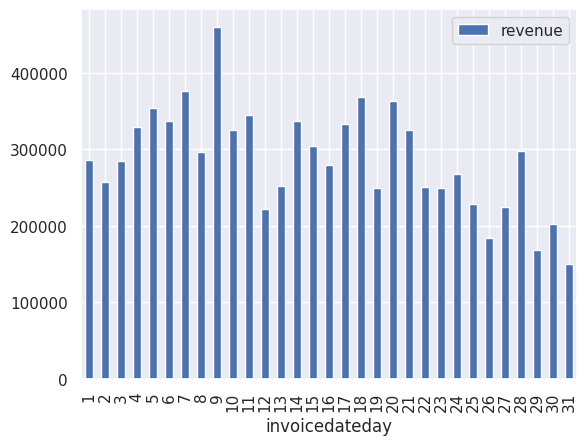

In [94]:
import seaborn as sns
sns.set()

results.plot(kind = 'bar')

In [95]:
# SELECT * FROM retail ORDER BY Quantity DESC LIMIT 5;
retail.nlargest(5, columns = 'quantity')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue,invoicedateday
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6,9
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6,18
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom,0.0,25
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901,United Kingdom,1008.0,27
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135,United Kingdom,3096.0,27


In [96]:
# SELECT * FROM retail ORDER BY Quantity LIMIT 5;
retail.nsmallest(5, columns = 'quantity')

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue,invoicedateday
113,536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311,United Kingdom,1.25,1
114,536381,22262,FELT EGG COSY CHICKEN,1,2010-12-01 09:41:00,0.85,15311,United Kingdom,0.85,1
115,536381,22637,PIGGY BANK RETROSPOT,1,2010-12-01 09:41:00,2.55,15311,United Kingdom,2.55,1
118,536381,21166,COOK WITH WINE METAL SIGN,1,2010-12-01 09:41:00,1.95,15311,United Kingdom,1.95,1
120,536381,37444A,YELLOW BREAKFAST CUP AND SAUCER,1,2010-12-01 09:41:00,2.95,15311,United Kingdom,2.95,1
